In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import kaggle 

plt.style.use('ggplot')
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings('ignore')

In [2]:
#kaggle.api.dataset_download_files('rupindersinghrana/airbnb-price-dataset','csv_files',unzip=True,quiet=False)

In [3]:
df=pd.read_csv('csv_files/Airbnb_Data.csv')

In [4]:
df.sample()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
58010,20152540,4.234107,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",He...",2,1.0,Real Bed,strict,True,SF,"This sweet, quiet space is just half a block f...",2014-11-24,t,t,NaN,2013-10-25,f,2017-09-15,37.762232,-122.421022,Room steps from Valencia,Mission District,126,86.0,NaN,94110,1.0,1.0


In [5]:
df.isna().mean()[df.isna().mean()>0]*100

#percentage of nan values

bathrooms                  0.269865
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
last_review               21.355804
neighbourhood              9.272578
review_scores_rating      22.563452
thumbnail_url             11.086074
zipcode                    1.303450
bedrooms                   0.122789
beds                       0.176762
dtype: float64

amenities

In [6]:
df['amenities']=df['amenities'].apply(lambda x:[i.replace('"','').replace('{','').replace('}','').strip() for i in x.split(',')])

In [7]:
all=[]
for amenities in df['amenities']:
    for amenity in amenities:
        all.append(amenity)

amenity_columns=pd.Series(all).unique().tolist()

for amenity_column in amenity_columns:
    df[f'amenity_{amenity_column}']=0

In [8]:
for i,amenities in enumerate(df['amenities']):
    for amenity in amenities:
        amenity_column=f'amenity_{amenity}'
        df.loc[i,amenity_column]=1
    print(i,end='\r')

In [9]:
df=df.drop(columns='amenities')

property_type

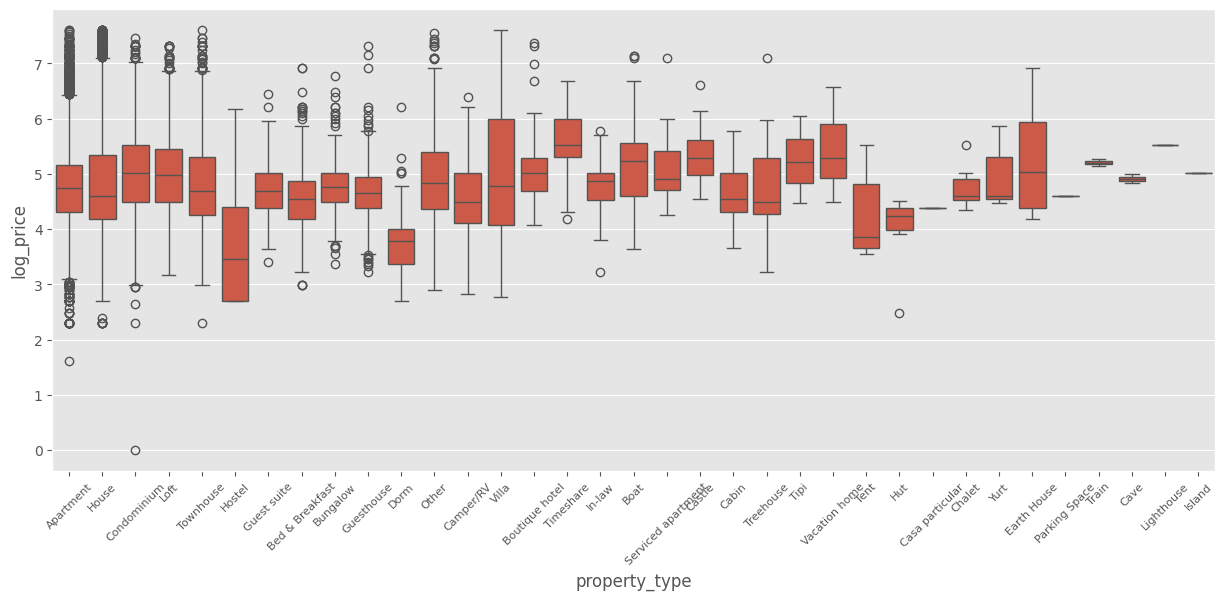

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(df,x='property_type',y='log_price')
plt.xticks(rotation=45,size=8)
plt.show()

(3.0, 6.0)

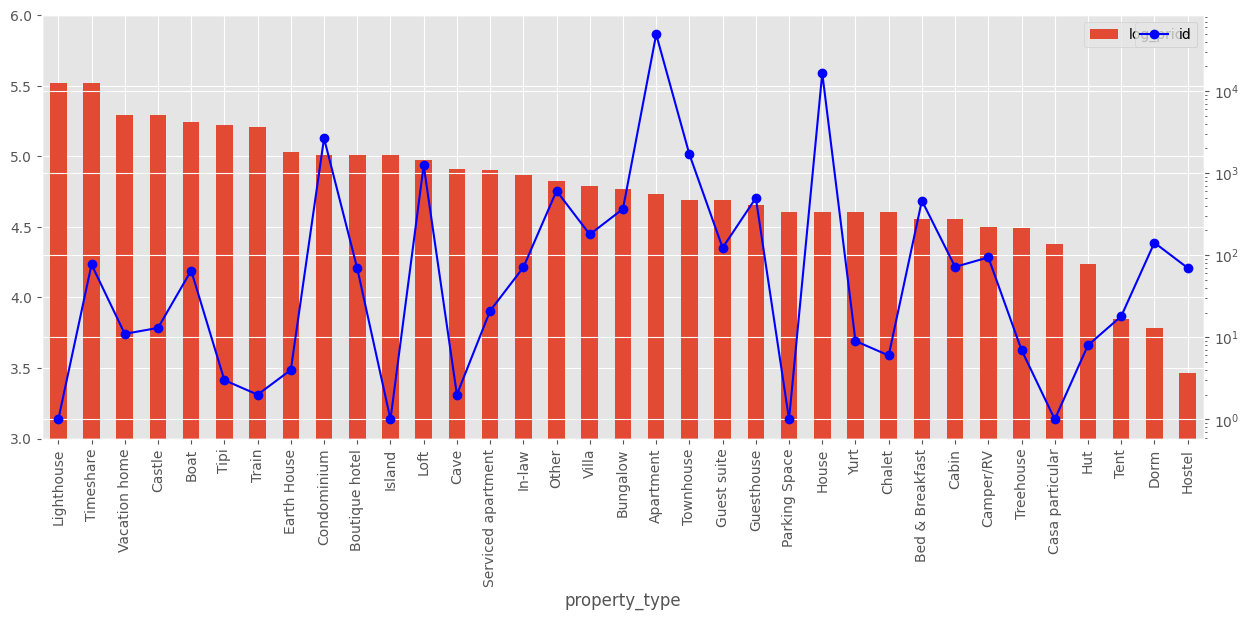

In [11]:
g=df.groupby('property_type').agg({'id':'count','log_price':'median'}).sort_values(ascending=False,by='log_price')

fig,ax=plt.subplots(figsize=(15,5.5))
ax2=ax.twinx()

g.plot.bar(ax=ax,y='log_price')
g.plot.line(ax=ax2,y='id',color='blue',marker='o')
ax2.set_yscale('log')
ax.set_ylim(3,6)

In [12]:
#there are rare labels, which are present only once

In [13]:
df['property_type']=df['property_type'].str.strip()

rare=df['property_type'].value_counts()[df['property_type'].value_counts()<10].index
df['property_type']=df['property_type'].apply(lambda x:'Other' if x in rare else x)

room_type

In [14]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

city

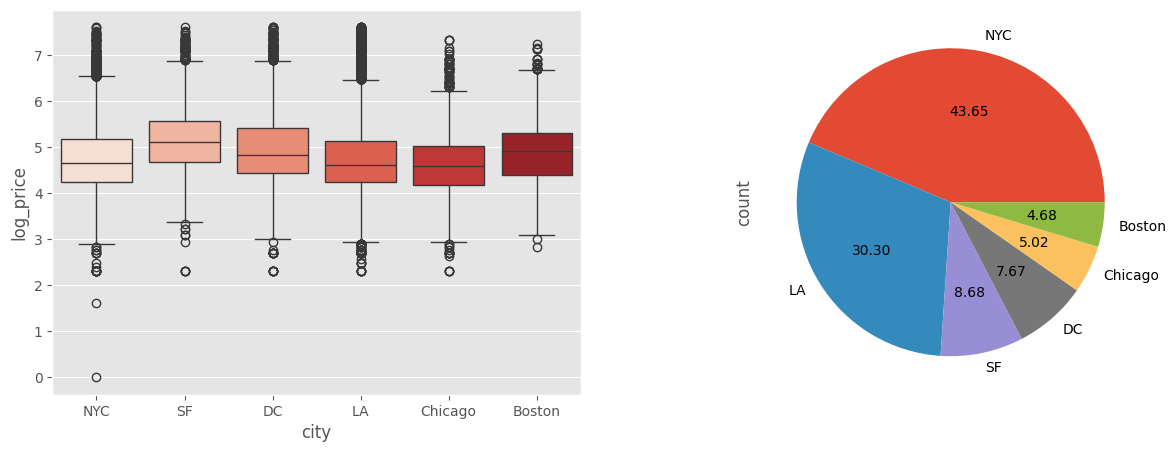

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.boxplot(df,x='city',y='log_price',ax=ax1,palette='Reds')
df['city'].value_counts().plot.pie(ax=ax2,autopct='%.2f')
plt.show()

host_response_rate

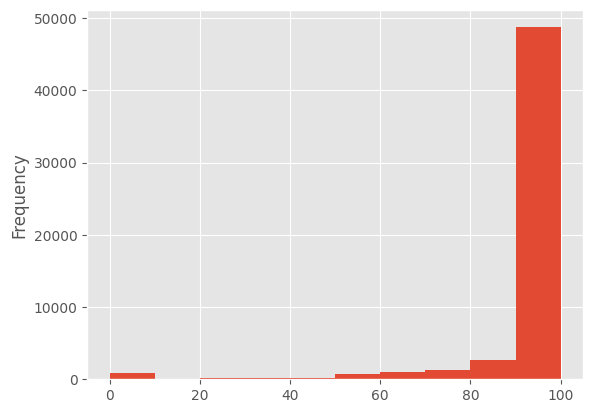

In [16]:
df['host_response_rate']=df['host_response_rate'].str.replace('%','').apply(pd.to_numeric)
df['host_response_rate'].plot.hist(bins=10)
plt.show()

host_since

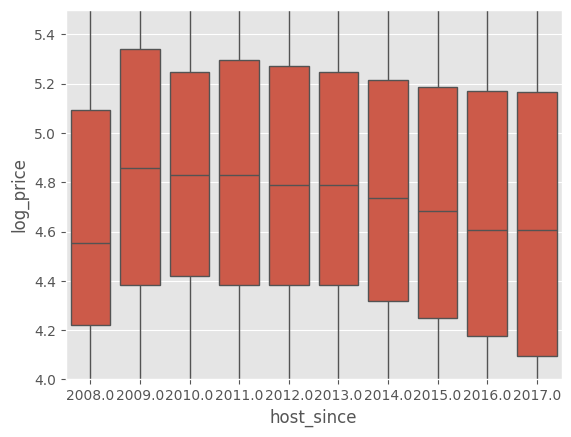

In [17]:
df['host_since']=pd.to_datetime(df['host_since'])
df['host_since']=df['host_since'].dt.year

sns.boxplot(x=df['host_since'],y=df['log_price'])
plt.ylim(4,5.5)
plt.show()

In [18]:
df['instant_bookable'].value_counts()

instant_bookable
f    54660
t    19451
Name: count, dtype: int64

last_review

In [19]:
from datetime import date
today = pd.Timestamp(date.today())

df['last_review'] = pd.to_datetime(df['last_review'])

years_since = (today - df['last_review']) / pd.Timedelta(days=365)
df.insert(df.columns.get_loc('last_review'),'years_since_last_review',years_since)

df=df.drop(columns='last_review')


remove unwanted columns

In [20]:

df=df.drop(columns=['id','first_review','description','name','thumbnail_url','zipcode','neighbourhood'],errors='ignore')

In [21]:
old_length=len(df)

df=df.dropna(how='any')
new_length=len(df)

print(new_length/old_length)

0.6447895723981595


In [22]:
for col in df.select_dtypes(object).columns:
    dummies=pd.get_dummies(df[col],prefix=col,dummy_na=False).astype(int)
    df=df.drop(columns=col)
    df=pd.concat([df,dummies],axis=1)

In [23]:
df

,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,host_since,years_since_last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,amenity_Wireless Internet,amenity_Air conditioning,amenity_Kitchen,amenity_Heating,amenity_Family/kid friendly,amenity_Essentials,amenity_Hair dryer,amenity_Iron,amenity_translation missing: en.hosting_amenity_50,amenity_Washer,amenity_Dryer,amenity_Smoke detector,amenity_Fire extinguisher,amenity_Shampoo,amenity_Hangers,amenity_TV,amenity_Cable TV,amenity_Breakfast,amenity_Buzzer/wireless intercom,amenity_Carbon monoxide detector,amenity_Laptop friendly workspace,amenity_Internet,amenity_Indoor fireplace,amenity_First aid kit,amenity_Elevator in building,amenity_Pool,amenity_Free parking on premises,amenity_Gym,amenity_Hot tub,amenity_Wheelchair accessible,amenity_Doorman,amenity_Dog(s),amenity_Cat(s),amenity_Other pet(s),amenity_Lock on bedroom door,amenity_Pets live on this property,amenity_Private entrance,...,amenity_Toilet paper,amenity_Wide clearance to shower and toilet,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Castle,property_type_Condominium,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Townhouse,property_type_Vacation home,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_f,instant_bookable_t
1,5.129899,7,1.0,True,100.0,2017.0,6.454795,40.766115,-73.989040,6,93.0,3.0,3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1
2,4.976734,5,1.0,True,100.0,2016.0,6.479452,40.808110,-73.943756,10,92.0,1.0,3.0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,4.744932,2,1.0,True,100.0,2015.0,7.123288,38.925627,-77.034596,4,40.0,0.0,1.0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
5,4.442651,2,1.0,True,100.0,2017.0,6.504110,37.753164,-122.429526,3,100.0,1.0,1.0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1
6,4.418841,3,1.0,True,100.0,2017.0,6.879452,33.980454,-118.462821,15,97.0,1.0,1.0,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.356709,2,1.0,True,100.0,2014.0,6.915068,41.909067,-87.623046,6,100.0,1.0,1.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [24]:
X=df.drop(columns='log_price')
y=df['log_price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [25]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
best_model=XGBRegressor()

In [26]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.01,0.05,0.1,0.15]}

grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

In [27]:
import joblib

joblib.dump(best_model,open('csv_files/best_model.pickle','wb'))
best_model=joblib.load(open('csv_files/best_model.pickle','rb'))

In [28]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

In [29]:
from sklearn import metrics

r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.8218324966827304, 'MAE_train': 0.19398499116342832, 'RMSE_train': 0.25685187524376446}
{'R2_test': 0.7122133724354422, 'MAE_test': 0.23960882602051967, 'RMSE_test': 0.3228729665587357}


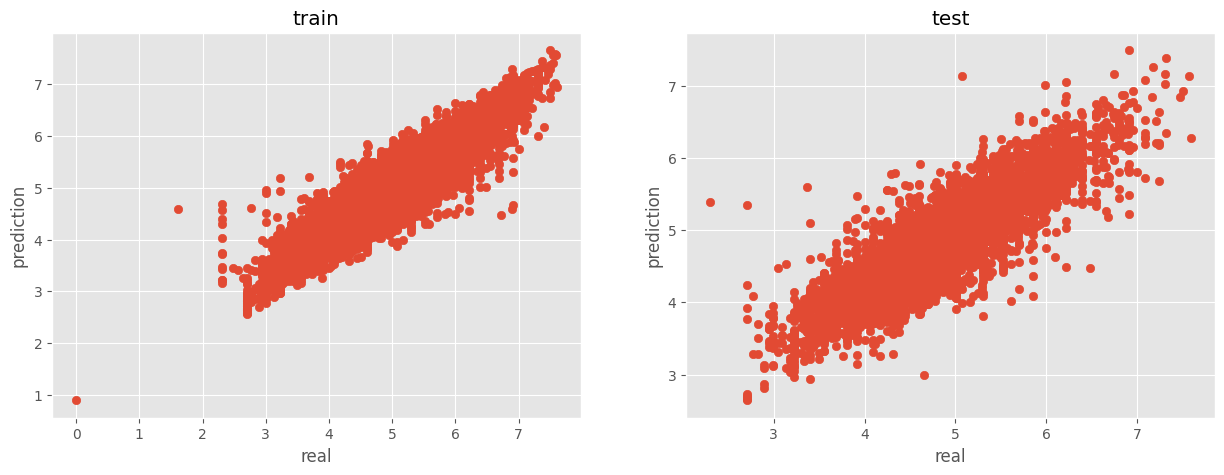

In [30]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.scatter(y_train,train_prediction)
ax1.set_xlabel('real')
ax1.set_ylabel('prediction')
ax1.set_title('train')
ax2.scatter(y_test,test_prediction)
ax2.set_xlabel('real')
ax2.set_ylabel('prediction')
ax2.set_title('test')
plt.show()